In [50]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify outliers using Z-score
from scipy import stats

In [14]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('resultados_11700_108.csv')  # Replace 'your_dataset.csv' with your actual file path

# Display the first few rows of the dataset
#df = df.head(20000)

df = df.drop(columns=['Archivo']) # "Inicio","Medio","Final", "Diferencia"
df = df.dropna()
df

,Inicio,Medio,Final,Diferencia
19,105097.0,105359.0,105621.0,524.0
24,106349.0,106701.0,107053.0,704.0
28,49154.0,49388.0,49622.0,468.0
45,98713.0,98982.0,99251.0,538.0
48,33849.0,33956.0,34063.0,214.0
...,...,...,...,...
259970,105685.0,105876.0,106067.0,382.0
259982,143216.0,143329.0,143443.0,227.0
259985,85949.0,86019.0,86090.0,141.0
259989,84337.0,84605.0,84873.0,536.0


In [54]:
def load_data(df):
    return df

def handle_missing_values(df):
    df_copy = df.copy()
    
    # Handle missing values in numeric columns with mean
    numeric_columns = df_copy.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
    
    # Handle missing values in categorical columns with mode (most frequent value)
    categorical_columns = df_copy.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0] if not df_copy[col].mode().empty else 'Unknown')
    
    return df_copy

def remove_outliers(df):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    print(z_scores)
    return df[(z_scores < 1.6).all(axis=1)]  # Remove rows with any outliers

def scale_data(df):
    scaler = StandardScaler()
    df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))
    return df

def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns) # One-hot encoding for categorical variables

def save_data(df, output_filepath):
    df.to_csv(output_filepath, index=False)

In [55]:
# Load the data
df_preprocessed = load_data(df)

# Handle missing values
#df_preprocessed = handle_missing_values(df_preprocessed)

# Remove outliers
df_preprocessed = remove_outliers(df_preprocessed)
print(df_preprocessed)
# Scale the data
df_preprocessed = scale_data(df_preprocessed)

# Encode categorical variables
#df_preprocessed = encode_categorical(df_preprocessed, ['Diferencia'])

# Display the preprocessed data
df_preprocessed

[[0.72926948 0.72938213 0.72947575 0.0758337 ]
 [0.75720681 0.75932199 0.76141703 0.69211105]
 [0.51905182 0.51932417 0.51960206 0.11589703]
 ...
 [0.30199786 0.29790905 0.29382978 1.23546754]
 [0.26602742 0.26636288 0.26668416 0.11691886]
 [1.35996111 1.36178986 1.36361454 0.64315653]]
          Inicio     Medio     Final  Diferencia
19      105097.0  105359.0  105621.0       524.0
24      106349.0  106701.0  107053.0       704.0
28       49154.0   49388.0   49622.0       468.0
45       98713.0   98982.0   99251.0       538.0
48       33849.0   33956.0   34063.0       214.0
...          ...       ...       ...         ...
259970  105685.0  105876.0  106067.0       382.0
259982  143216.0  143329.0  143443.0       227.0
259985   85949.0   86019.0   86090.0       141.0
259989   84337.0   84605.0   84873.0       536.0
259995   11469.0   11626.0   11783.0       314.0

[17530 rows x 4 columns]


C:\Users\david\AppData\Local\Temp\ipykernel_25916\3051499001.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))


,Inicio,Medio,Final,Diferencia
19,0.805876,0.806699,0.807506,0.342281
24,0.836118,0.839116,0.842096,1.258843
28,-0.545435,-0.545297,-0.545169,0.057128
45,0.651669,0.652661,0.653636,0.413569
48,-0.915130,-0.918062,-0.921001,-1.236242
...,...,...,...,...
259970,0.820079,0.819188,0.818279,-0.380784
259982,1.726646,1.723876,1.721109,-1.170046
259985,0.343353,0.339536,0.335728,-1.607959
259989,0.304415,0.305380,0.306331,0.403385


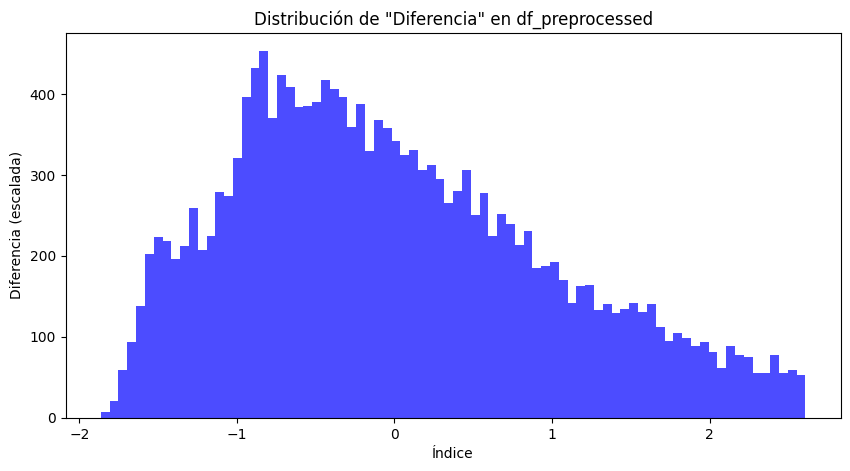

In [62]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_preprocessed['Diferencia'], bins=80, color='blue', alpha=0.7)
plt.title('Distribución de "Diferencia" en df_preprocessed')
plt.xlabel('Índice')
plt.ylabel('Diferencia (escalada)')
plt.show()


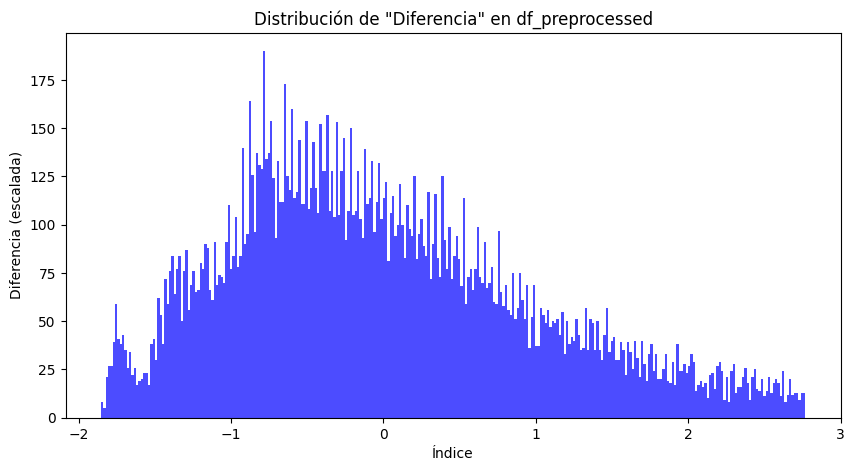

In [45]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_preprocessed['Diferencia'], bins=300, color='blue', alpha=0.7)
plt.title('Distribución de "Diferencia" en df_preprocessed')
plt.xlabel('Índice')
plt.ylabel('Diferencia (escalada)')
plt.show()
